In [1]:
# Veri analizi, makine öğrenimi ve görselleştirme için temel kütüphaneleri yükler
!pip install pandas scikit-learn nltk matplotlib seaborn zemberek-python

# Derin öğrenme ve doğal dil işleme (NLP) kütüphanelerini yükler
!pip install tensorflow transformers

# Kelime bulutu oluşturma için gerekli kütüphaneyi yükler
!pip install wordcloud

# Not: Python'un yüklü olduğundan ve uyumlu bir sanal ortam (virtual environment) kullandığınızdan emin olun.


In [2]:
# pandas kütüphanesini 'pd' olarak içe aktarır
import pandas as pd

# CSV dosyasını yükler
# r ile başlayan dize, dosya yolunun ham (raw) bir dize olduğunu belirtir
# Bu, ters eğik çizgi (\) ile ilgili kaçış karakteri hatalarını önler
data = pd.read_csv(r"C:\Users\birge\Downloads\turkish_news_70000.csv\turkish_news_70000.csv")

# Veri setinin ilk 5 satırını görüntüler
# Bu, veri setindeki sütun isimlerini ve başlangıçtaki bazı verileri anlamak için kullanılır
data.head()  # İlk 5 satırı döndürür


,id,main_image,published,site,text,title,url
0,72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar..."
1,72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-..."
2,72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m..."
3,72340,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:53:00.000+02:00""","""diken.com.tr""","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""http://www.diken.com.tr/agridaki-iyi-partilil..."
4,72341,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:52:00.000+02:00""","""diken.com.tr""","""Otomobil pazarı iki ayda yarı yarıya eridi 04...","""Otomobil pazarı iki ayda yarı yarıya eridi""","""http://www.diken.com.tr/otomobil-pazari-iki-a..."


In [3]:
# Gerekli kütüphaneleri içe aktarır
import re  # Düzenli ifadelerle metin işleme için
import nltk  # Doğal dil işleme kütüphanesi
from nltk.corpus import stopwords  # Durak kelimeleri işlemek için

# NLTK'nin durak kelime listesini indirir
nltk.download('stopwords')

# Türkçe durak kelimeleri (örneğin: "ve", "bir", "için") bir sete dönüştürür
stop_words = set(stopwords.words('turkish'))

# Metni temizlemek için bir fonksiyon tanımlar
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Fazla boşlukları tek bir boşluğa indirir
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldırır
    text = text.lower()  # Tüm metni küçük harfe dönüştürür
    words = text.split()  # Metni kelimelere böler
    # Durak kelimeleri metinden kaldırır
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)  # Temizlenmiş kelimeleri birleştirip döndürür

# 'text' sütunundaki her bir metni temizleyip yeni bir sütun oluşturur
# 'apply' fonksiyonu her bir satıra temizleme fonksiyonunu uygular
data['cleaned_text'] = data['text'].apply(clean_text)

# Temizlenmiş metinlerin ilk 5 satırını yazdırır
print(data['cleaned_text'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\birge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    yatırım bankası dolartl üçüncü çeyrekte 890ı g...
1    pi̇ar araştırma adana antalyada millet ittifak...
2    renaissance capital merkez bankası hafta 100 b...
3    ağrıdaki i̇yi̇ partililerin istifa gerekçesi a...
4    otomobil pazarı iki ayda yarı yarıya eridi 040...
Name: cleaned_text, dtype: object


In [4]:
# Gerekli kütüphaneyi içe aktarır
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vektörizasyonu için

# TF-IDF vektörizerini tanımlar
# max_features=5000 ile yalnızca en sık kullanılan 5000 kelimeyi seçeriz
vectorizer = TfidfVectorizer(max_features=5000)

# 'cleaned_text' sütunundaki metinleri vektörize eder
# fit_transform ile vektörize edilip, .toarray() ile numpy dizisine dönüştürülür
X = vectorizer.fit_transform(data['cleaned_text']).toarray()

# Hedef (etiket) değişkenini belirler
# Örneğin, 'site' kolonunu kategoriler için etiket olarak kullanıyoruz
y = data['site']  # Bu kolon, metinlerin kategorilerini temsil eder

# İlk 5 vektörü yazdırır
# Bu, vektörlerin nasıl göründüğünü incelemek için kullanılır
print(X[:5])  # İlk 5 vektörü gösterir


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
# Veriyi eğitim ve test setlerine ayırmak için sklearn kütüphanesinden 'train_test_split' fonksiyonunu içe aktarır
from sklearn.model_selection import train_test_split

# Veriyi %80 eğitim, %20 test olarak ayırır
# test_size=0.2 ile test verisinin oranını %20 olarak ayarlarız
# random_state=42, sonuçların tekrarlanabilir olmasını sağlar (her çalıştırmada aynı bölme)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını yazdırır
# X_train ve X_test, özellikleri (vektörleri), y_train ve y_test ise etiketleri (kategorileri) içerir
print(f'Eğitim seti: {X_train.shape}, Test seti: {X_test.shape}')


Eğitim seti: (57687, 5000), Test seti: (14422, 5000)


In [6]:
# Gerekli kütüphaneyi içe aktarır
from nltk.stem import WordNetLemmatizer  # Lemmatization işlemi için WordNetLemmatizer'ı kullanır
nltk.download('wordnet')  # WordNet veri setini indirir

# Lemmatizer'ı başlatır
lemmatizer = WordNetLemmatizer()  # WordNetLemmatizer, kelimeleri köklerine indirger

# Metni lemmatize etmek için bir fonksiyon tanımlar
def lemmatize_text(text):
    # Metni kelimelere böler
    words = text.split()
    # Her bir kelimeyi lemmatize eder (kök haline indirger)
    words = [lemmatizer.lemmatize(word) for word in words]
    # Kök hale getirilmiş kelimeleri tekrar birleştirip döndürür
    return ' '.join(words)

# Temizlenmiş metinlerin üzerine lemmatization işlemi uygular
# 'cleaned_text' sütunundaki her bir metni lemmatize eder ve 'lemmatized_text' olarak kaydeder
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\birge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


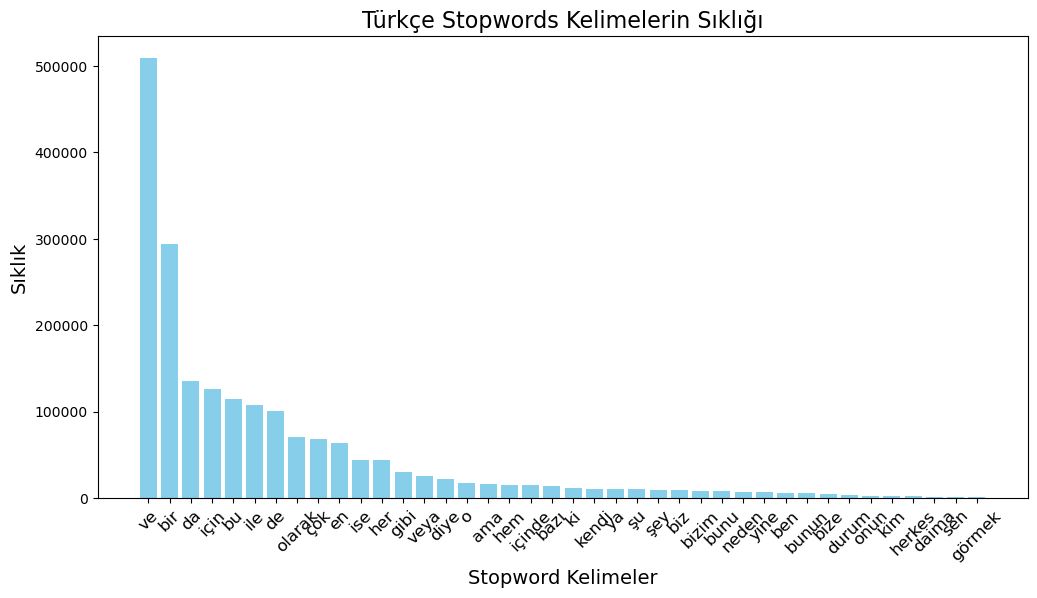

In [7]:
# Gerekli kütüphaneleri içe aktarır
import matplotlib.pyplot as plt  # Görselleştirme için matplotlib
from collections import Counter  # Kelime sayımı için Counter
import pandas as pd  # Veri işleme için pandas

# Türkçe stopwords (durak kelimeler) listesi
turkish_stopwords = [
    've', 'bir', 'bu', 'da', 'de', 'için', 'olarak', 'ile', 'ben', 'gibi', 'onun', 'bunu', 'şu', 'o', 'çok',
    'daima', 'yine', 'her', 'biz', 'kendi', 'neden', 'görmek', 'en', 'ya', 'ise', 'bunun', 'veya', 'ki', 'ama',
    'hem', 'gibi', 'bize', 'bazı', 'kim', 'sen', 'bizim', 'herkes', 'şey', 'veya', 'durum', 'diye', 'içinde'
]

# Stopwords sıklığını hesaplayan fonksiyon
def stopwords_frequency(text_column, stopwords):
    all_text = ' '.join(text_column)  # Tüm metinleri tek bir dizede birleştirir
    all_words = all_text.split()  # Metni kelimelere böler
    # Stopwords'leri sayar ve sayımlarını yapar
    stopwords_count = Counter([word for word in all_words if word in stopwords])  
    return stopwords_count

# 'text' kolonundaki metinlerin stopwords sıklığını hesaplar
stopwords_count = stopwords_frequency(data['text'], turkish_stopwords)

# Stopwords sıklıklarını pandas DataFrame formatında düzenler
# 'Stopword' ve 'Frequency' olarak iki kolon oluşturur, sıklığa göre azalan sırayla sıralar
stopwords_df = pd.DataFrame(stopwords_count.items(), columns=['Stopword', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Sıklıkları görselleştirir
plt.figure(figsize=(12, 6))  # Grafik boyutunu ayarlar
plt.bar(stopwords_df['Stopword'], stopwords_df['Frequency'], color='skyblue')  # Bar grafiği çizer
plt.title("Türkçe Stopwords Kelimelerin Sıklığı", fontsize=16)  # Başlık ekler
plt.xlabel("Stopword Kelimeler", fontsize=14)  # X eksenini etiketler
plt.ylabel("Sıklık", fontsize=14)  # Y eksenini etiketler
plt.xticks(rotation=45, fontsize=12)  # X eksenindeki etiketleri döndürür ve yazı boyutunu ayarlar
plt.show()  # Grafiği gösterir


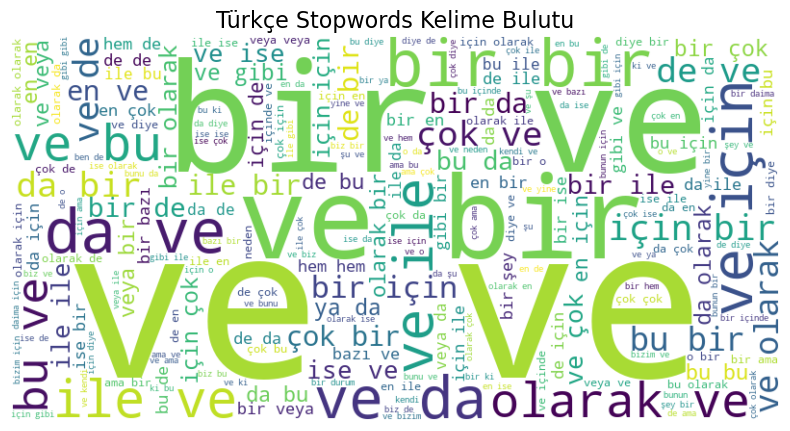

In [8]:
# Gerekli kütüphaneleri içe aktarır
from wordcloud import WordCloud  # Kelime bulutu oluşturmak için
import matplotlib.pyplot as plt  # Görselleştirme için

# Stopwords kelimelerinin tüm metinlerdeki sıklığını içeren metin oluşturma fonksiyonu
def generate_text_for_stopwords(text_column, stopwords):
    all_text = ' '.join(text_column)  # Tüm metinleri tek bir dizede birleştirir
    # Sadece stopwords kelimelerini içeren bir metin oluşturur
    stopwords_text = ' '.join([word for word in all_text.split() if word in stopwords])  
    return stopwords_text

# Stopwords kelimeleri için metin oluşturma
stopwords_text = generate_text_for_stopwords(data['text'], turkish_stopwords)

# Kelime bulutunu oluşturur
# width ve height, görselin boyutlarını ayarlar
# background_color, arka plan rengini belirler
# colormap, renk şemasını seçer (örneğin 'viridis')
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(stopwords_text)

# Kelime bulutunu görselleştirir
plt.figure(figsize=(10, 5))  # Görsel boyutunu ayarlar
plt.imshow(wordcloud, interpolation='bilinear')  # Kelime bulutunu görselleştirir
plt.axis('off')  # Eksenleri gizler
plt.title("Türkçe Stopwords Kelime Bulutu", fontsize=16)  # Başlık ekler
plt.show()  # Grafiği gösterir


In [9]:
# Temizleme işlemiyle stopwords çıkarma fonksiyonu tanımlar
def clean_text_v2(text):
    text = re.sub(r'\s+', ' ', text)  # Fazla boşlukları tek bir boşlukla değiştirir
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldırır
    text = text.lower()  # Metni küçük harfe dönüştürür
    words = text.split()  # Metni kelimelere böler
    # Durak kelimeleri (turkish_stopwords) metinden çıkarır
    words = [word for word in words if word not in turkish_stopwords]  
    return ' '.join(words)  # Temizlenmiş kelimeleri birleştirip döndürür

# Durak kelimeleri çıkararak temizleme işlemi uygular
# 'text' kolonundaki her metni 'clean_text_v2' fonksiyonuyla temizler ve 'cleaned_text_v2' olarak kaydeder
data['cleaned_text_v2'] = data['text'].apply(clean_text_v2)


In [10]:
# Temizleme işleminden önceki ve sonraki metinleri karşılaştırma
# İlk 5 metni alır ve 'text' (ham metin) ve 'cleaned_text_v2' (durak kelimeler çıkarılmış metin) kolonlarını içerir
comparison_df = data[['text', 'cleaned_text_v2']].head(5)

# 'stopwords_removed' kolonu oluşturur, her satırda durak kelimelerinin farkını hesaplar
comparison_df['stopwords_removed'] = comparison_df.apply(
    # 'text' ve 'cleaned_text_v2' arasındaki farkları hesaplar
    lambda row: list(set(row['text'].lower().split()) - set(row['cleaned_text_v2'].split())), axis=1
)

# Karşılaştırma DataFrame'ini yazdırır
print(comparison_df)


                                                text  \
0  "Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...   
1  "PİAR Araştırma: Adana ve Antalya’da ‘millet i...   
2  "Renaissance Capital: Merkez Bankası bu hafta ...   
3  "Ağrı’daki İYİ Partililerin istifa gerekçesi: ...   
4  "Otomobil pazarı iki ayda yarı yarıya eridi 04...   

                                     cleaned_text_v2  \
0  yatırım bankası dolartl üçüncü çeyrekte 890ı g...   
1  pi̇ar araştırma adana antalyada millet ittifak...   
2  renaissance capital merkez bankası hafta 100 b...   
3  ağrıdaki i̇yi̇ partililerin istifa gerekçesi a...   
4  otomobil pazarı iki ayda yarı yarıya eridi 040...   

                                   stopwords_removed  
0  [temmuz’da, yaşanmasıdır., bankası:, etti., re...  
1  [ile, isparta’da, 44.5\nchp’li, reklam\nhata, ...  
2  [‘4’üncü, 2’lik, yazmıştı.", olabilir., çok, b...  
3  [en, sayan’ı, akp’den, etti., arşiv\neski, say...  
4  [a,, 52.2, 76.5’i, 82.4’ünü, indi., oldu., kes..

In [11]:
# 'stopwords_removed' sütunundaki her bir listeyi alır, listenin uzunluğunu hesaplar
# ve tüm uzunlukları toplar. Bu, çıkarılan durak kelimelerinin toplam sayısını verir.
removed_word_count = comparison_df['stopwords_removed'].apply(len).sum()

# Çıkarılan durak kelimelerinin toplam sayısını yazdırır
print(f"Toplam çıkarılan durak kelime sayısı: {removed_word_count}")


Toplam çıkarılan durak kelime sayısı: 238


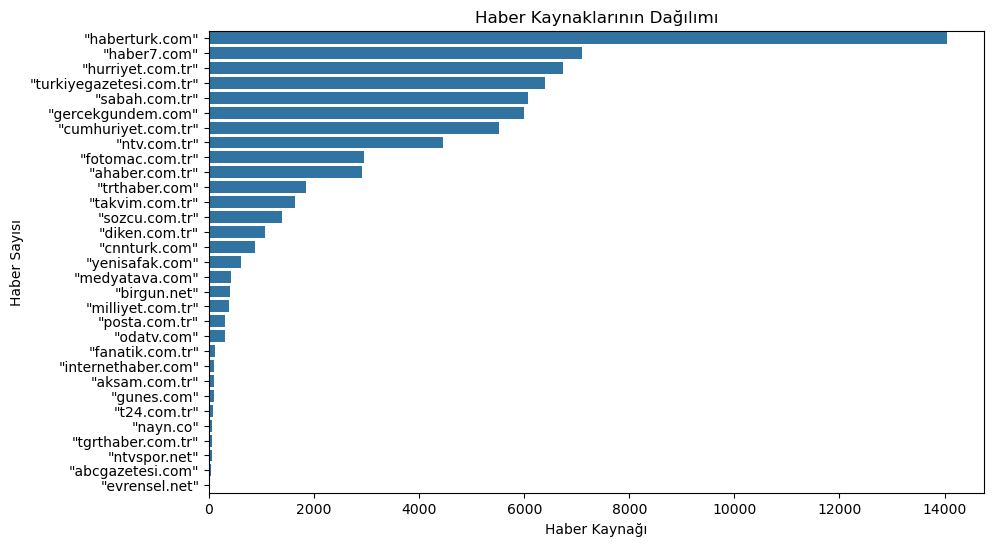

In [12]:
# Gerekli kütüphaneleri içe aktarır
import matplotlib.pyplot as plt  # Görselleştirme için matplotlib
import seaborn as sns  # Gelişmiş görselleştirme için seaborn

# Kategorilerin (site) dağılımını görselleştirmek için countplot kullanır
# 'data['site']' kolonundaki haber kaynaklarını y ekseninde gösterir
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlar
sns.countplot(y=data['site'], order=data['site'].value_counts().index)  # 'site' kolonundaki her kategoriyi sayar ve sıralar
plt.title('Haber Kaynaklarının Dağılımı')  # Başlık ekler
plt.xlabel('Haber Kaynağı')  # X eksenini etiketler
plt.ylabel('Haber Sayısı')  # Y eksenini etiketler
plt.show()  # Grafiği gösterir


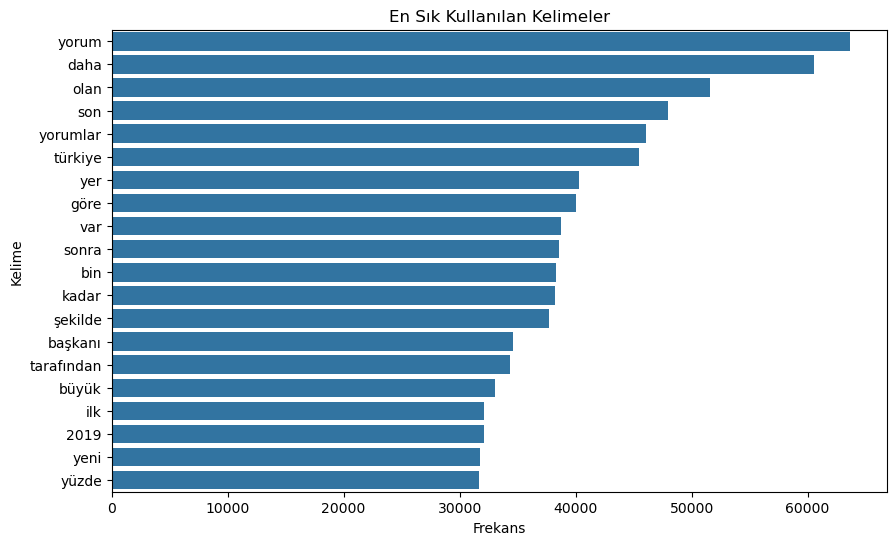

In [13]:
# Gerekli kütüphaneyi içe aktarır
from collections import Counter  # Kelime sayımı için Counter

# Tüm metinleri birleştirerek kelimeleri sayma
# 'cleaned_text_v2' kolonundaki metinleri birleştirir ve kelimelere ayırır
all_words = ' '.join(data['cleaned_text_v2']).split()

# Kelimelerin sıklığını hesaplamak için Counter kullanır
word_counts = Counter(all_words)

# En sık 20 kelimeyi alır
most_common_words = word_counts.most_common(20)

# Kelimeleri ve frekanslarını ayrı listelere ayırır
words, counts = zip(*most_common_words)

# Görselleştirme işlemi
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlar
sns.barplot(x=counts, y=words)  # Kelimeleri ve frekansları bar grafiğiyle gösterir
plt.title('En Sık Kullanılan Kelimeler')  # Başlık ekler
plt.xlabel('Frekans')  # X eksenini etiketler (kelimelerin frekansı)
plt.ylabel('Kelime')  # Y eksenini etiketler (kelimeler)
plt.show()  # Grafiği gösterir


In [14]:
# Gerekli kütüphaneleri içe aktarır
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes modelini kullanmak için
from sklearn.svm import SVC  # Destek Vektör Makinesi (SVM) için
from sklearn.ensemble import RandomForestClassifier  # Rastgele Orman modelini kullanmak için
from sklearn.metrics import accuracy_score  # Model doğruluğunu hesaplamak için
from sklearn.linear_model import SGDClassifier  # Stokastik Gradyan İniş (SGD) sınıflandırıcı

# Naive Bayes modeli
nb_model = MultinomialNB()  # Naive Bayes modelini başlatır
nb_model.fit(X_train, y_train)  # Eğitim verisiyle modeli eğitir
y_pred_nb = nb_model.predict(X_test)  # Test verisi üzerinde tahmin yapar
# Naive Bayes modelinin doğruluğunu yazdırır
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Random Forest modeli
rf_model = RandomForestClassifier()  # Random Forest modelini başlatır
rf_model.fit(X_train, y_train)  # Eğitim verisiyle modeli eğitir
y_pred_rf = rf_model.predict(X_test)  # Test verisi üzerinde tahmin yapar
# Random Forest modelinin doğruluğunu yazdırır
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# SVM modeli (SGDClassifier kullanarak)
svm_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)  # SVM için SGDClassifier kullanır
svm_model.fit(X_train, y_train)  # Eğitim verisiyle modeli eğitir
y_pred_svm = svm_model.predict(X_test)  # Test verisi üzerinde tahmin yapar
# SVM modelinin doğruluğunu yazdırır
print("SVM (SGD) Accuracy:", accuracy_score(y_test, y_pred_svm))


Naive Bayes Accuracy: 0.4655387602274303
Random Forest Accuracy: 0.8769934821800027
SVM (SGD) Accuracy: 0.8054361392317293


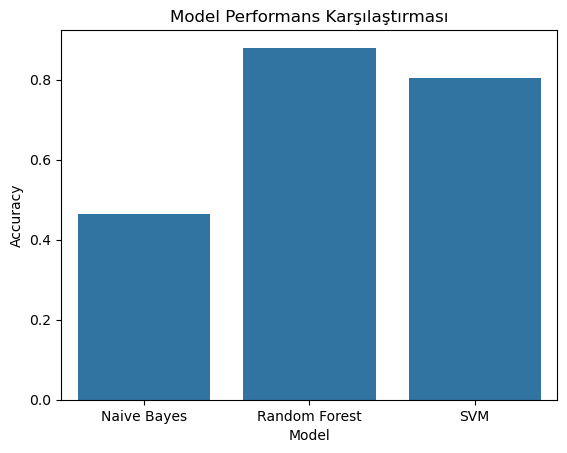

In [15]:
# Gerekli kütüphaneyi içe aktarır
import seaborn as sns  # Gelişmiş görselleştirme için seaborn

# Model sonuçlarını içeren bir sözlük oluşturur
results = {'Model': ['Naive Bayes', 'Random Forest', 'SVM'],  # Modellerin adları
           'Accuracy': [0.4655, 0.8799, 0.8054]}  # Her bir modelin doğruluğu

# Sözlüğü bir pandas DataFrame'ine dönüştürür
results_df = pd.DataFrame(results)

# Bar grafiği ile model doğruluklarını görselleştirir
sns.barplot(x='Model', y='Accuracy', data=results_df)

# Grafiğe başlık ekler
plt.title('Model Performans Karşılaştırması')

# Grafiği gösterir
plt.show()


In [16]:
pip install torch


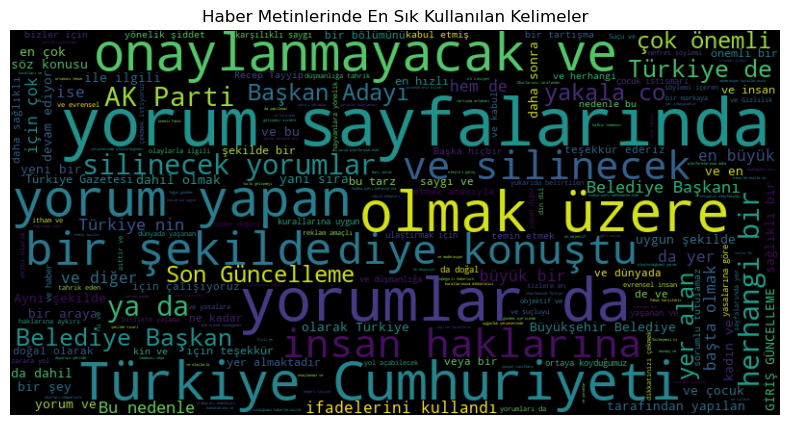

In [17]:
# Gerekli kütüphaneyi içe aktarır
from wordcloud import WordCloud  # Kelime bulutu oluşturmak için WordCloud

# 'text' kolonundaki tüm metinleri birleştirir (her metin arasına boşluk ekler)
text_data = " ".join(data['text'].astype(str))

# Kelime bulutunu oluşturur (genişlik: 800px, yükseklik: 400px)
wordcloud = WordCloud(width=800, height=400).generate(text_data)

# Kelime bulutunu görselleştirir
plt.figure(figsize=(10, 5))  # Grafik boyutlarını ayarlar
plt.imshow(wordcloud, interpolation='bilinear')  # Kelime bulutunu görsel olarak gösterir
plt.axis('off')  # Eksenleri gizler
plt.title('Haber Metinlerinde En Sık Kullanılan Kelimeler')  # Başlık ekler
plt.show()  # Grafiği gösterir


In [18]:
# Gerekli kütüphaneyi içe aktarır
from transformers import AutoTokenizer  # Hugging Face Transformers kütüphanesinden AutoTokenizer sınıfını import eder

# BERT tokenizer'ını "dbmdz/bert-base-turkish-cased" modeline göre başlatır
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")

# Metinleri token'lara dönüştürür
# 'data['cleaned_text_v2']' kolonundaki metinleri alır, padding ve truncation işlemleri uygular, maksimum uzunluğu 512 token olarak belirler
tokens = tokenizer.batch_encode_plus(
    data['cleaned_text_v2'].tolist(),  # Metin verilerini listeye çevirir
    padding=True,  # Her token dizisini eşit uzunlukta yapar (padding işlemi)
    truncation=True,  # Metni 512 token'dan uzun olanları keser
    max_length=512  # Maksimum uzunluğu 512 olarak belirler
)


In [19]:
# Gerekli kütüphaneyi içe aktarır
from sklearn.metrics import classification_report  # Modelin sınıflandırma raporunu almak için

# Sınıflandırma raporunu yazdırır
# 'y_test' gerçek etiketler, 'y_pred_rf' tahmin edilen etiketlerdir
# 'target_names' parametresi, her sınıfın adlarını belirtir, burada 'data['site'].unique()' her bir sınıfın ismini alır
print(classification_report(y_test, y_pred_rf, target_names=data['site'].unique()))


C:\Users\birge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\birge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                          precision    recall  f1-score   support

          "diken.com.tr"       0.00      0.00      0.00         4
          "trthaber.com"       0.79      0.75      0.77       565
         "yenisafak.com"       0.00      0.00      0.00        19
       "hurriyet.com.tr"       0.87      0.42      0.57        78
           "cnnturk.com"       0.99      0.80      0.88       169
         "haberturk.com"       0.95      0.88      0.91      1073
       "milliyet.com.tr"       0.86      0.74      0.79       203
     "cumhuriyet.com.tr"       0.00      0.00      0.00         4
          "sabah.com.tr"       0.92      0.39      0.55        28
            "t24.com.tr"       0.71      0.86      0.77       605
          "sozcu.com.tr"       0.81      0.95      0.87      1208
            "haber7.com"       0.00      0.00      0.00        14
"turkiyegazetesi.com.tr"       0.98      0.96      0.97      1407
          "posta.com.tr"       0.86      0.96      0.91      2846
         

C:\Users\birge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


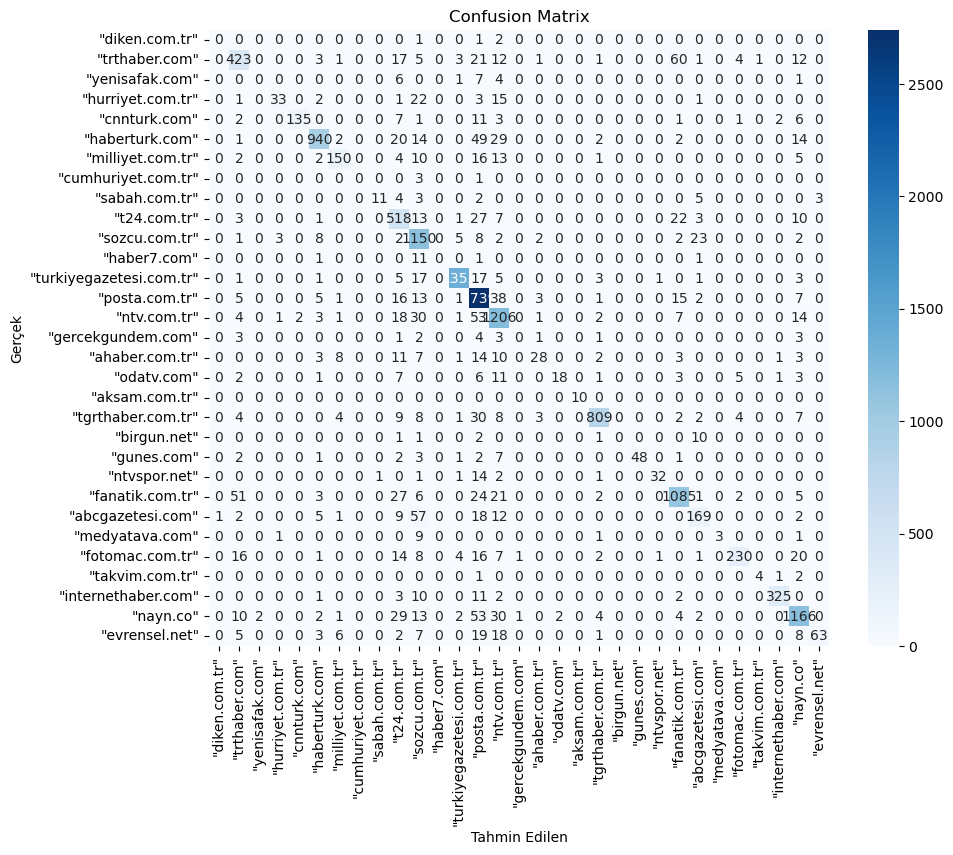

In [20]:
# Gerekli kütüphaneleri içe aktarır
from sklearn.metrics import confusion_matrix  # Confusion matrix hesaplamak için
import seaborn as sns  # Görselleştirme için seaborn

# Gerçek etiketler (y_test) ile tahmin edilen etiketler (y_pred_rf) arasındaki confusion matrix'i hesaplar
cm = confusion_matrix(y_test, y_pred_rf)

# Confusion matrix'i görselleştirir
plt.figure(figsize=(10, 8))  # Grafik boyutlarını ayarlar
sns.heatmap(cm,  # Confusion matrix'i ısı haritası olarak görselleştirir
            annot=True,  # Hücrelerde sayıları gösterir
            fmt='d',  # Sayıları tam sayı olarak gösterir
            cmap='Blues',  # Renk paletini 'Blues' olarak ayarlar
            xticklabels=data['site'].unique(),  # X eksenindeki etiketler (tahmin edilen sınıflar)
            yticklabels=data['site'].unique())  # Y eksenindeki etiketler (gerçek sınıflar)

# Grafik başlıkları ve etiketleri ekler
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')

# Grafiği gösterir
plt.show()


In [21]:
# Gerekli kütüphaneleri içe aktarır
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vektörleştirici
import joblib  # Model ve vektörleştiriciyi kaydetmek için joblib

# TfidfVectorizer'ı tanımlar
tfidf_vectorizer = TfidfVectorizer()  # Metin verilerini sayısal vektörlere dönüştürür

# Vektörleştiriciyi veriye uygular (burada 'data' metin verisi olmalıdır)
tfidf_vectorizer.fit(data['cleaned_text_v2'])  # 'cleaned_text_v2' kolonundaki metin verileriyle fit edilir

# Model ve vektörleştiriciyi kaydeder
joblib.dump(rf_model, 'random_forest_model.pkl')  # Random Forest modelini 'random_forest_model.pkl' adıyla kaydeder
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')  # TF-IDF vektörleştiricisini 'tfidf_vectorizer.pkl' adıyla kaydeder

# Kaydetme işleminin başarılı olduğunu belirtir
print("Model ve TF-IDF Vectorizer başarıyla kaydedildi.")


Model ve TF-IDF Vectorizer başarıyla kaydedildi.


In [22]:
# Gerekli kütüphaneleri içe aktarır
import joblib  # Kaydedilen model ve vektörleştiriciyi yüklemek için

# Kaydedilen modeli yükler
loaded_model = joblib.load('random_forest_model.pkl')  # 'random_forest_model.pkl' dosyasından model yüklenir

# Kaydedilen TF-IDF vektörleştiricisini yükler
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')  # 'tfidf_vectorizer.pkl' dosyasından vektörleştirici yüklenir

# Yükleme işleminin başarılı olduğunu belirtir
print("Model ve TF-IDF Vectorizer başarıyla yüklendi.")


Model ve TF-IDF Vectorizer başarıyla yüklendi.


In [23]:
# Gerekli kütüphaneyi içe aktarır
import re  # Metin temizliği için regex işlemlerini yapabilmek için

# Temizleme fonksiyonu
def clean_text(text):
    text = text.lower()  # Küçük harfe çevirir
    text = re.sub(r'\d+', '', text)  # Sayıları kaldırır
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldırır
    return text

# Temizlenmiş metni 'cleaned_text_v2' kolonunda saklar
data['cleaned_text_v2'] = data['text'].apply(clean_text)  # 'text' kolonundaki metinleri temizler

# Kategorilere ayırma fonksiyonu
def categorize_news(text):
    if "ekonomi" in text or "borsa" in text:  # Ekonomiyle ilgili kelimeler
        return "economy"
    elif "spor" in text or "maç" in text:  # Sporla ilgili kelimeler
        return "sports"
    elif "seçim" in text or "meclis" in text:  # Politika ile ilgili kelimeler
        return "politics"
    else:
        return "other"  # Diğer kategori

# Kategoriyi her haber metnine uygular
data['category'] = data['cleaned_text_v2'].apply(categorize_news)  # Her temizlenmiş metni kategoriye ayırır

# Kategorilere göre örnekleri görüntüler
print(data[['cleaned_text_v2', 'category']].head())  # Temizlenmiş metin ve kategoriyi gösterir


                                     cleaned_text_v2  category
0  yatırım bankası dolartl üçüncü çeyrekte ı göre...     other
1  piar araştırma adana ve antalyada millet ittif...     other
2  renaissance capital merkez bankası bu hafta  b...   economy
3  ağrıdaki iyi partililerin istifa gerekçesi akp...  politics
4  otomobil pazarı iki ayda yarı yarıya eridi  no...     other


In [24]:
# Kategorilere göre anahtar kelimelerle metinleri sınıflandıran fonksiyon
def categorize_news(text):
    # Kategorilere ait anahtar kelimeler
    categories = {
        "economy": ["ekonomi", "borsa", "dolar", "faiz", "yatırım", "piyasa", "finans", "altın", "kripto"],
        "sports": ["spor", "maç", "gol", "futbol", "basketbol", "şampiyona", "lig", "transfer"],
        "politics": ["seçim", "meclis", "politik", "hükümet", "milletvekili", "parti", "anayasa", "başkan"],
        "technology": ["teknoloji", "yazılım", "robotik", "internet", "dijital", "siber güvenlik", "inovasyon"],
        "health": ["sağlık", "hastalık", "ilaç", "tedavi", "doktor", "aşı", "pandemi", "fitness"],
        "entertainment": ["eğlence", "film", "dizi", "sanatçı", "konser", "festival", "albüm"],
        "science": ["bilim", "araştırma", "uzay", "keşif", "fizik", "kimya", "biyoloji"],
        "world": ["dünya", "uluslararası", "kriz", "savaş", "BM", "NATO", "AB", "diplomasi"],
        "local": ["yerel", "belediye", "şehir", "mahalle", "festival", "proje", "muhtar"],
        "education": ["eğitim", "okul", "üniversite", "öğrenci", "sınav", "burs", "MEB", "kurs"],
        "crime": ["suç", "polis", "mahkeme", "hırsızlık", "saldırı", "tutuklama", "yargı"],
        "environment": ["çevre", "iklim", "kirlilik", "enerji", "doğa", "orman", "geri dönüşüm"]
    }
    
    # Küçük harfe dönüştürme ve metin üzerinde anahtar kelimeleri kontrol etme
    text_lower = text.lower()  # Metni küçük harfe dönüştürür
    for category, keywords in categories.items():
        # Eğer metinde kategoriyle ilişkili bir anahtar kelime varsa, o kategori döndürülür
        if any(keyword in text_lower for keyword in keywords):
            return category
    return "other"  # Eğer hiçbiri yoksa, 'other' kategorisini döndürür

# Kategoriyi her haber metnine uygular
data['category'] = data['cleaned_text_v2'].apply(categorize_news)  # 'cleaned_text_v2' kolonunda temizlenmiş metni kullanarak kategorilere ayırma

# Kategorilere göre örnekleri görüntüler
print(data[['cleaned_text_v2', 'category']].head())  # Temizlenmiş metin ve kategoriyi gösterir


                                     cleaned_text_v2  category
0  yatırım bankası dolartl üçüncü çeyrekte ı göre...   economy
1  piar araştırma adana ve antalyada millet ittif...  politics
2  renaissance capital merkez bankası bu hafta  b...   economy
3  ağrıdaki iyi partililerin istifa gerekçesi akp...  politics
4  otomobil pazarı iki ayda yarı yarıya eridi  no...   economy


In [25]:
print(data[['cleaned_text_v2', 'category']])

                                         cleaned_text_v2  category
0      yatırım bankası dolartl üçüncü çeyrekte ı göre...   economy
1      piar araştırma adana ve antalyada millet ittif...  politics
2      renaissance capital merkez bankası bu hafta  b...   economy
3      ağrıdaki iyi partililerin istifa gerekçesi akp...  politics
4      otomobil pazarı iki ayda yarı yarıya eridi  no...   economy
...                                                  ...       ...
72104  prodigynin solisti keith flint evinde ölü bulu...    health
72105  adanada sahte icra müdürü gerçeğini dolandırdı...   economy
72106  maçoğlundan athena gökhana o sözler bize enerj...    sports
72107  hasköye hızır gelmiş meçhul birisi kapılara  l...     local
72108  meb yönetimi isyan etti diyarbakırda  öğretmen...   economy

[72109 rows x 2 columns]


In [26]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine ayırma
X = data['cleaned_text_v2']  # 'cleaned_text_v2' kolonu, temizlenmiş metinler
y = data['category']  # 'category' kolonu, haber kategorileri

# Eğitim seti (%80) ve test seti (%20) olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını yazdırma
print(f'Eğitim seti: {X_train.shape}, Test seti: {X_test.shape}')


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirme işlemi
vectorizer = TfidfVectorizer(max_features=5000, stop_words=None)  # max_features: En fazla 5000 özelliği alır.

# Eğitim ve test verilerini vektörleştirme
X_train_vec = vectorizer.fit_transform(X_train)  # Eğitim verilerini fit ve transform et
X_test_vec = vectorizer.transform(X_test)  # Test verilerine yalnızca transform uygula


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirme işlemi
vectorizer = TfidfVectorizer(max_features=5000, stop_words=None)  # max_features: En fazla 5000 terim kullanır.

# Eğitim ve test verilerini vektörleştirme
X_train_vec = vectorizer.fit_transform(X_train)  # Eğitim verilerine fit et ve aynı zamanda dönüştür.
X_test_vec = vectorizer.transform(X_test)  # Test verisini yalnızca dönüştür (fit edilmez, eğitimde öğrendiklerini uygular).


In [29]:
from sklearn.linear_model import LogisticRegression

# Model oluşturma ve eğitim
model = LogisticRegression(max_iter=1000)  # Modeli oluşturuyoruz ve max_iter parametresi modelin optimizasyon işleminin maksimum iterasyon sayısını belirliyor.
model.fit(X_train_vec, y_train)  # Modeli eğitim verisi ile eğitiyoruz. X_train_vec: Eğitim verisinin sayısal temsili, y_train: Etiketler (kategoriler)


LogisticRegression(max_iter=1000)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Test verisiyle tahmin yapma
y_pred = model.predict(X_test_vec)  # Test verisini kullanarak modelin tahminlerde bulunmasını sağlıyoruz.

# Modelin doğruluğunu yazdırma
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")  # Modelin doğruluk oranını yazdırıyoruz.

# Kategorilere göre detaylı değerlendirme
print(classification_report(y_test, y_pred))  # F1 skoru, doğruluk, hassasiyet ve özgüllük gibi detaylı performans metriklerini yazdırıyoruz.

# Confusion matrix (karmaşıklık matrisi)
print(confusion_matrix(y_test, y_pred))  # Modelin tahmin ettiği kategoriler ile gerçek kategoriler arasındaki karşılaştırmayı gösteren karmaşıklık matrisini yazdırıyoruz.


Accuracy: 0.795174039661628
               precision    recall  f1-score   support

        crime       0.81      0.26      0.40       129
      economy       0.84      0.88      0.86      5215
    education       0.64      0.34      0.44        83
entertainment       0.68      0.29      0.41       151
  environment       0.75      0.16      0.26        57
       health       0.63      0.80      0.70      1759
        local       0.69      0.27      0.39       255
        other       0.68      0.57      0.62       436
     politics       0.76      0.79      0.77      2167
      science       0.89      0.12      0.21        66
       sports       0.88      0.87      0.87      3699
   technology       0.73      0.30      0.43       256
        world       0.59      0.24      0.34       149

     accuracy                           0.80     14422
    macro avg       0.73      0.45      0.52     14422
 weighted avg       0.80      0.80      0.79     14422

[[  34   18    0    0    0   50   

In [64]:
def predict_category(news_text):
    # Yeni haber metnini vektörleştir
    news_vec = vectorizer.transform([news_text])  # Vektörleştirici (TF-IDF) ile yeni haber metnini vektöre dönüştürürüz.
    
    # Modeli kullanarak tahmin yap
    prediction = model.predict(news_vec)  # Modeli kullanarak metnin kategorisini tahmin ederiz.
    
    return prediction[0]  # Tahmin edilen kategoriyi döndürürüz.

# Örnek bir haber metni ile tahmin yapalım
news_text = "Türkiye'de erken seçim tartışmaları gündemi meşgul ederken, muhalefet liderleri yeni ittifak stratejileri üzerinde çalıştıklarını açıkladı"  # Örnek haber metni
category = predict_category(news_text)  # Kategoriyi tahmin ederiz.
print(f"Tahmin Edilen Kategori: {category}")  # Tahmin edilen kategoriyi yazdırırız.


Tahmin Edilen Kategori: politics
